# Task 1 k-NearestNeighbours

In [52]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Create dataset

In [53]:
N = 1000
N_train = int(N*0.9) # Use 90% for training
N_test = N - N_train # Rest for testing
x, y = make_moons(n_samples=N, noise=0.2,random_state=0)
# Split into train and test set
xtrain, ytrain = x[:N_train,...], y[:N_train,...]
xtest, ytest = x[N_train:,...], y[N_train:,...]

1. Visualize the dataset. You can use matplotlib or any other plotting library
of your choice. (1P)

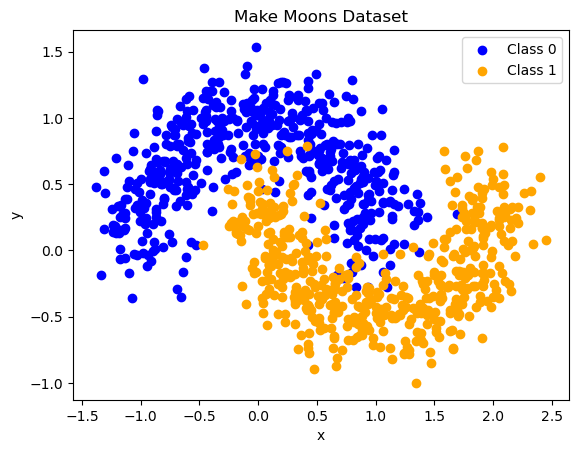

In [54]:
# Scatter plot for class 0
plt.scatter(x[y==0, 0], x[y==0, 1], c='blue', label='Class 0')
# Scatter plot for class 1
plt.scatter(x[y==1, 0], x[y==1, 1], c='orange', label='Class 1')

plt.title("Make Moons Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

2. Implement a method kneighbours to return the indices and the distance of
the k nearest neighbours from the training set for a given query point. Use
the euclidean distance as distance metric. (2P)

3. Add a predict functionality to your KNN class which returns the predicted
label for a given query point. (1P)


In [55]:
class KNN:
    def __init__(self, k):
        self.k = k
    def fit(self, x, y):
        # Fit routine
        self.x = x
        self.y = y
    def kneighbours(self, q):
        # Return nearest neighbour indices and distances
        # Pairwise squared distances that are summed up along each x's dimensions and then taken the squareroot of
        distances = np.sqrt(np.sum((self.x - q) ** 2, axis=1))
        
        # Sort x according to their distances to q and take the first k elements
        indices = np.argsort(distances)[0:self.k]
        
        return indices, distances[indices]
    
    def predict(self, q):
        # Prediction function - Majority class vote
        indices, _ = self.kneighbours(q)

        # Count the occurance of each class in the k-neighbours and then take the majority
        pred = np.argmax(np.bincount(self.y[indices]))
        return pred
        
        

4. Fit your KNN model for k = 5 to the data. Repeat this step using the
KNeighborsClassifier provided by sklearn and make sure both return
the same predictions. (1P)

In [56]:
k = 5

# Selects a random element from the xtrain array
random_row = np.random.choice(xtrain.shape[0])
q = np.array(xtrain[random_row])

# Reshape q into an 2 dimensional array with 1 row of length len(q)
q = q.reshape(1, -1)

# My own implementation
knn = KNN(k)
knn.fit(xtrain, ytrain)
prediction = knn.predict(q)
print("My prediction:", prediction)

# Sklearn implementation
sk_knn = KNeighborsClassifier(k)
sk_knn.fit(xtrain, ytrain)

sk_prediction = sk_knn.predict(q)[0]
print("Sklearn prediction:", sk_prediction)


My prediction: 0
Sklearn prediction: 0


5. Run your KNN model with different values of k = 2i
for i = 0, ..., 9. (1P)

In [57]:
k = 2

for exp in range(10):
  iter_k = k ** exp
  
  knn = KNN(iter_k)
  knn.fit(xtrain, ytrain)
  prediction = knn.predict(q)
  print(f'k: {iter_k}, prediction: {prediction}')


k: 1, prediction: 0
k: 2, prediction: 0
k: 4, prediction: 0
k: 8, prediction: 0
k: 16, prediction: 0
k: 32, prediction: 0
k: 64, prediction: 0
k: 128, prediction: 0
k: 256, prediction: 0
k: 512, prediction: 0


6. Plot the decision boundary for each k. (1P)
Hint: Evaluate the classifier on a grid within a box. Use around 100 points
in each direction and generate the grid via np.meshgrid. Visualize the area
with a contour plot (contourf using matplotlib).

(91, 117)


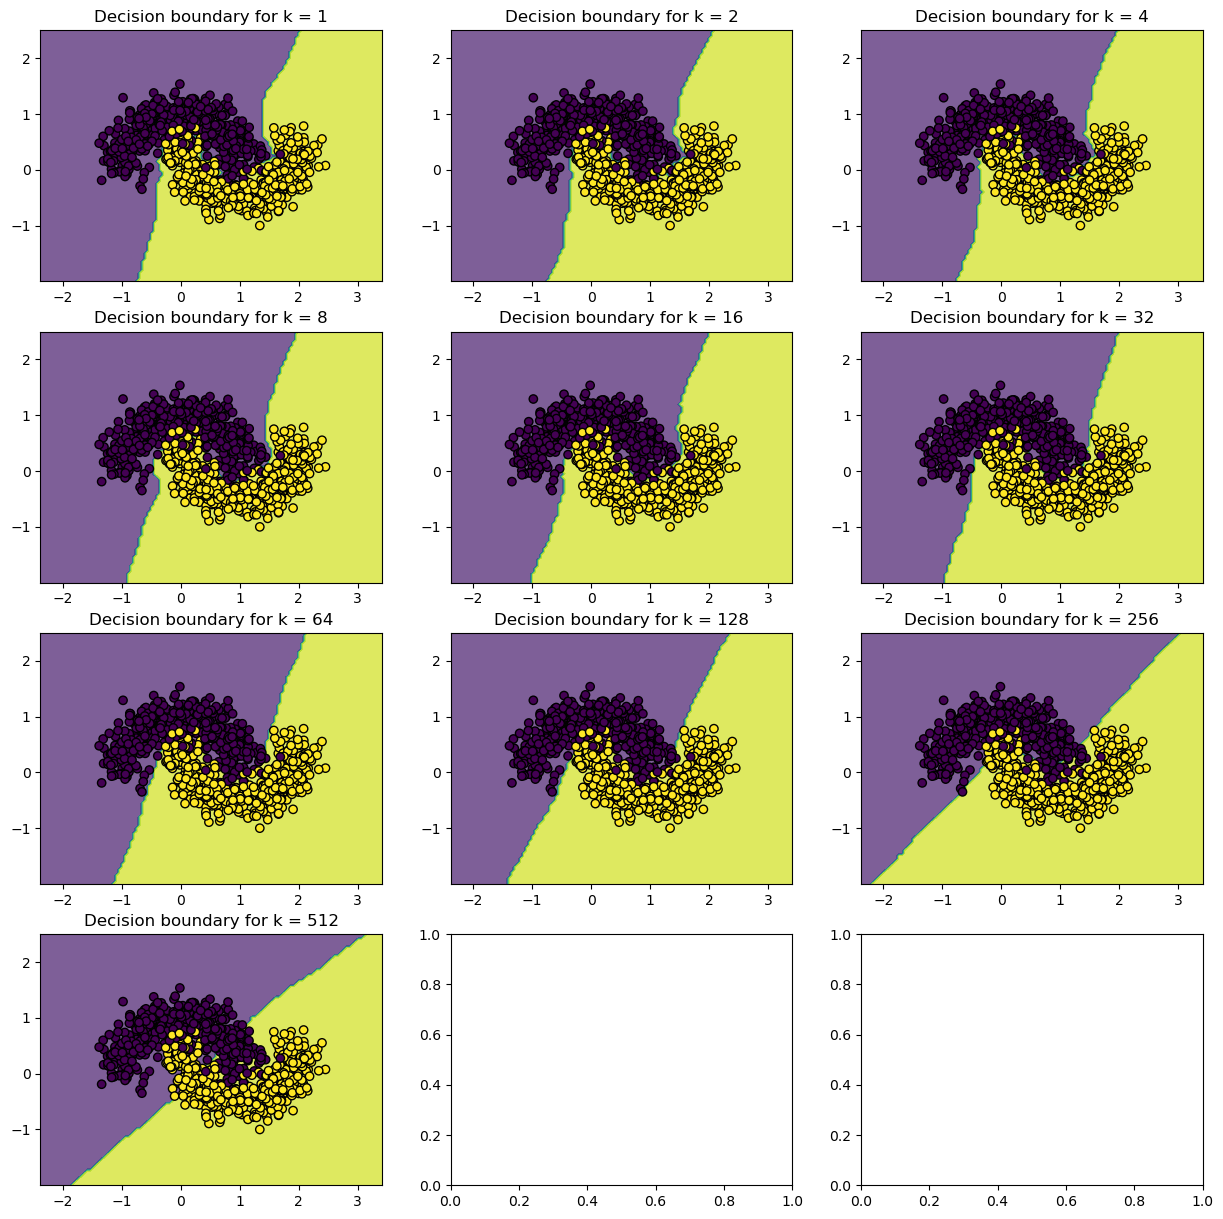

In [58]:
k = 2

# Create a grid of points
x_min, x_max = xtrain[:, 0].min() - 1, xtrain[:, 0].max() + 1 # feature 1
y_min, y_max = xtrain[:, 1].min() - 1, xtrain[:, 1].max() + 1 # feature 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

fig, axs = plt.subplots(4, 3, figsize=(15, 15))

for exp in range(10):
    iter_k = k ** exp
    knn = KNN(iter_k)
    knn.fit(xtrain, ytrain)

    z = np.empty_like(xx)

    # Make the knn prediction for every point in the grid
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            q = np.array([xx[i, j], yy[i, j]]).reshape(1, -1)

            z[i, j] = knn.predict(q)
    
    # Calculate the row and column indices
    x_axis = exp // 3
    y_axis = exp % 3

    # Plot the decision boundary along with the data points for every k
    axs[x_axis][y_axis].contourf(xx, yy, z, alpha=0.7)
    axs[x_axis][y_axis].scatter(xtrain[:, 0], xtrain[:, 1], c=ytrain, edgecolor='k')
    axs[x_axis][y_axis].set_title(f'Decision boundary for k = {iter_k}')
plt.show()

7. How does the decision boundary change with k? What would happen if k is
equal to the number of train samples? (1P)

The higher the k, the smoother the decision boundary. This is because more points are taken into account and thus noise values have less impact.
If k = len(xtrain), then all data points will be taken into account and thus the class, to which more data points belong to will always be chosen. -> There won't be a decision boundary anymore

8. Report class probabilities p(c) on the train set. Further plot p(xn) = k
NV ⋆ by
estimating V
⋆ as the area of the smallest circle needed to include k nearest
neighbours for query point xn. Use k = 2, 4, 8, 16, 32. Repeat the same plots
for p(xn|c). (2P)

In [59]:
p0 = round(sum(ytrain == 0) / len(ytrain), 4)
print("p(0) =", p0)

p1 = round(sum(ytrain == 1) / len(ytrain), 4)
print("p(1) =", p1)

p(0) = 0.5033
p(1) = 0.4967


In [60]:
def euclid(a, b): np.sqrt(sum((a-b) ** 2)) 

In [61]:
def px(x, k):
  knn = KNN(k)
  knn.fit(xtrain, ytrain)
  
  _, distances = knn.kneighbours(x)

  radius = distances[-1]
  n = xtrain.shape[0]
  v = np.pi * (radius ** 2)
  return k / (n * v)

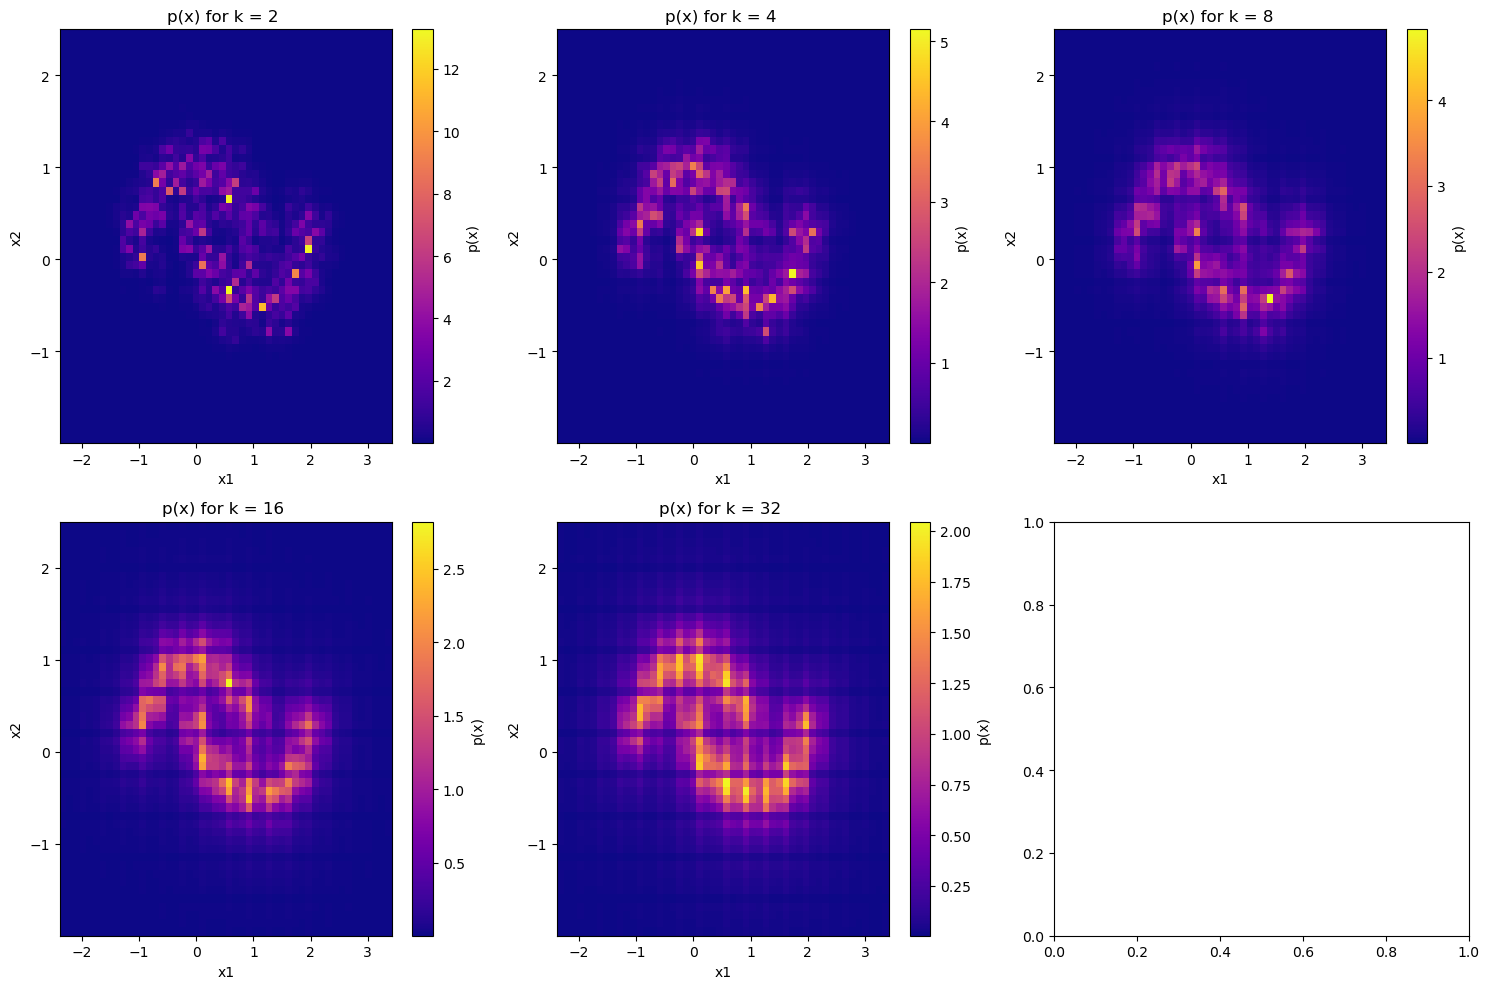

In [62]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Create a grid of points
x_min, x_max = xtrain[:, 0].min() - 1, xtrain[:, 0].max() + 1 # feature 1
y_min, y_max = xtrain[:, 1].min() - 1, xtrain[:, 1].max() + 1 # feature 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Define the values of k
k_values = [2, 4, 8, 16, 32]

for k in k_values:
    # Initialize an empty list to store the values of p(x)
    px_values = np.zeros(xx.shape)

    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            q = np.array([xx[i, j], yy[i, j]]).reshape(1, -1)
            px_values[i, j] = px(q, k)

    x_axis = int((np.log2(k) - 1) // 3)
    y_axis = int((np.log2(k) - 1) % 3)

    # Plot the data in a histogram
    h = axs[x_axis][y_axis].hist2d(xx.ravel(), yy.ravel(), weights=px_values.ravel(), bins=50, cmap='plasma')
    axs[x_axis][y_axis].set_title(f"p(x) for k = {k} ")
    axs[x_axis][y_axis].set_xlabel("x1")
    axs[x_axis][y_axis].set_ylabel("x2")
    fig.colorbar(h[3], ax=axs[x_axis][y_axis], label='p(x)')

plt.tight_layout() # Avoid overlapping of subplots
plt.show()

In [63]:
def pxc(x, k, c):
  knn = KNN(k)
  # Calculate dataset, where all points are of class c
  xtrain_c = xtrain[ytrain == c]
  ytrain_c = ytrain[ytrain == c]
  
  knn.fit(xtrain_c, ytrain_c)

  _, distances = knn.kneighbours(x)
  radius = distances[-1]
  n_c = xtrain_c.shape[0]
  v = np.pi * (radius ** 2)
  pxc = k / (n_c * v)
  #print(pxc)
  return pxc

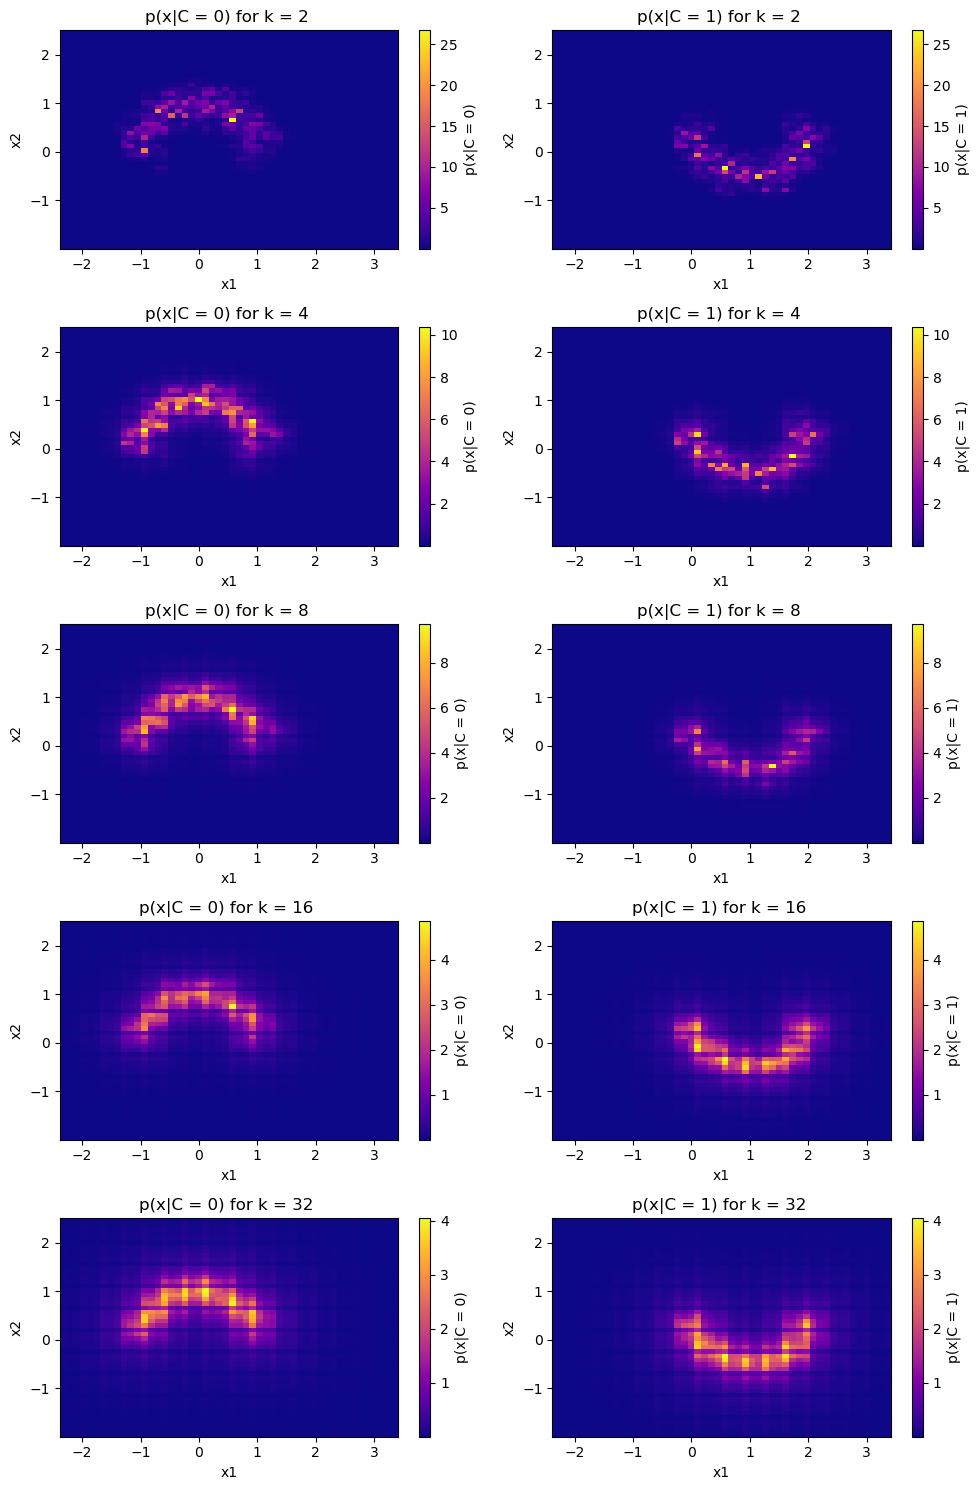

In [64]:
fig, axs = plt.subplots(5, 2, figsize=(10, 15))

# Create a grid of points
x_min, x_max = xtrain[:, 0].min() - 1, xtrain[:, 0].max() + 1 # feature 1
y_min, y_max = xtrain[:, 1].min() - 1, xtrain[:, 1].max() + 1 # feature 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Define the values of k
k_values = [2, 4, 8, 16, 32]


for k in k_values:
    # Initialize an empty list to store the values of p(x)
    px0_values = np.zeros(xx.shape)
    px1_values = np.zeros(xx.shape)

    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            q = np.array([xx[i, j], yy[i, j]]).reshape(1, -1)
            px0_values[i][j] = pxc(q, k, 0) # Values for class 0
            px1_values[i][j] = pxc(q, k, 1) # Values for class 1

    x_axis = int((np.log2(k) - 1))
    y_axis = int((np.log2(k) - 1) % 3)

    # Plot the data in a histogram
    h = axs[x_axis][0].hist2d(xx.ravel(), yy.ravel(), weights=px0_values.ravel(), bins=50, cmap='plasma')
    axs[x_axis][0].set_title(f"p(x|C = 0) for k = {k} ")
    axs[x_axis][0].set_xlabel("x1")
    axs[x_axis][0].set_ylabel("x2")

    h = axs[x_axis][1].hist2d(xx.ravel(), yy.ravel(), weights=px1_values.ravel(), bins=50, cmap='plasma')
    axs[x_axis][1].set_title(f"p(x|C = 1) for k = {k} ")
    axs[x_axis][1].set_xlabel("x1")
    axs[x_axis][1].set_ylabel("x2")
    fig.colorbar(h[3], ax=axs[x_axis][0], label='p(x|C = 0)')
    fig.colorbar(h[3], ax=axs[x_axis][1], label='p(x|C = 1)')

plt.tight_layout() # Avoid overlapping of subplots
plt.show()